# Q1 Weather Forecasting Prediction

### Load the Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix,roc_curve, roc_auc_score



### Data Loading

In [56]:
df=pd.read_csv('weather_data.csv')

### Exploratory data analysis (EDA)

In [57]:
# print the first 5 rows of the dataframe
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,1/1/2023,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,1/2/2023,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,1/3/2023,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,1/4/2023,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,1/5/2023,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [58]:
# get the summary of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [59]:
# check the shape of the dataframe
df.shape

(311, 7)

In [60]:
# check the columns of the dataframe
df.columns

Index(['date', 'avg_temperature', 'humidity', 'avg_wind_speed', 'rain_or_not',
       'cloud_cover', 'pressure'],
      dtype='object')

In [61]:
# Descriptive statistics of the dataframe
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [62]:
# check for missing values
df.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

<Axes: >

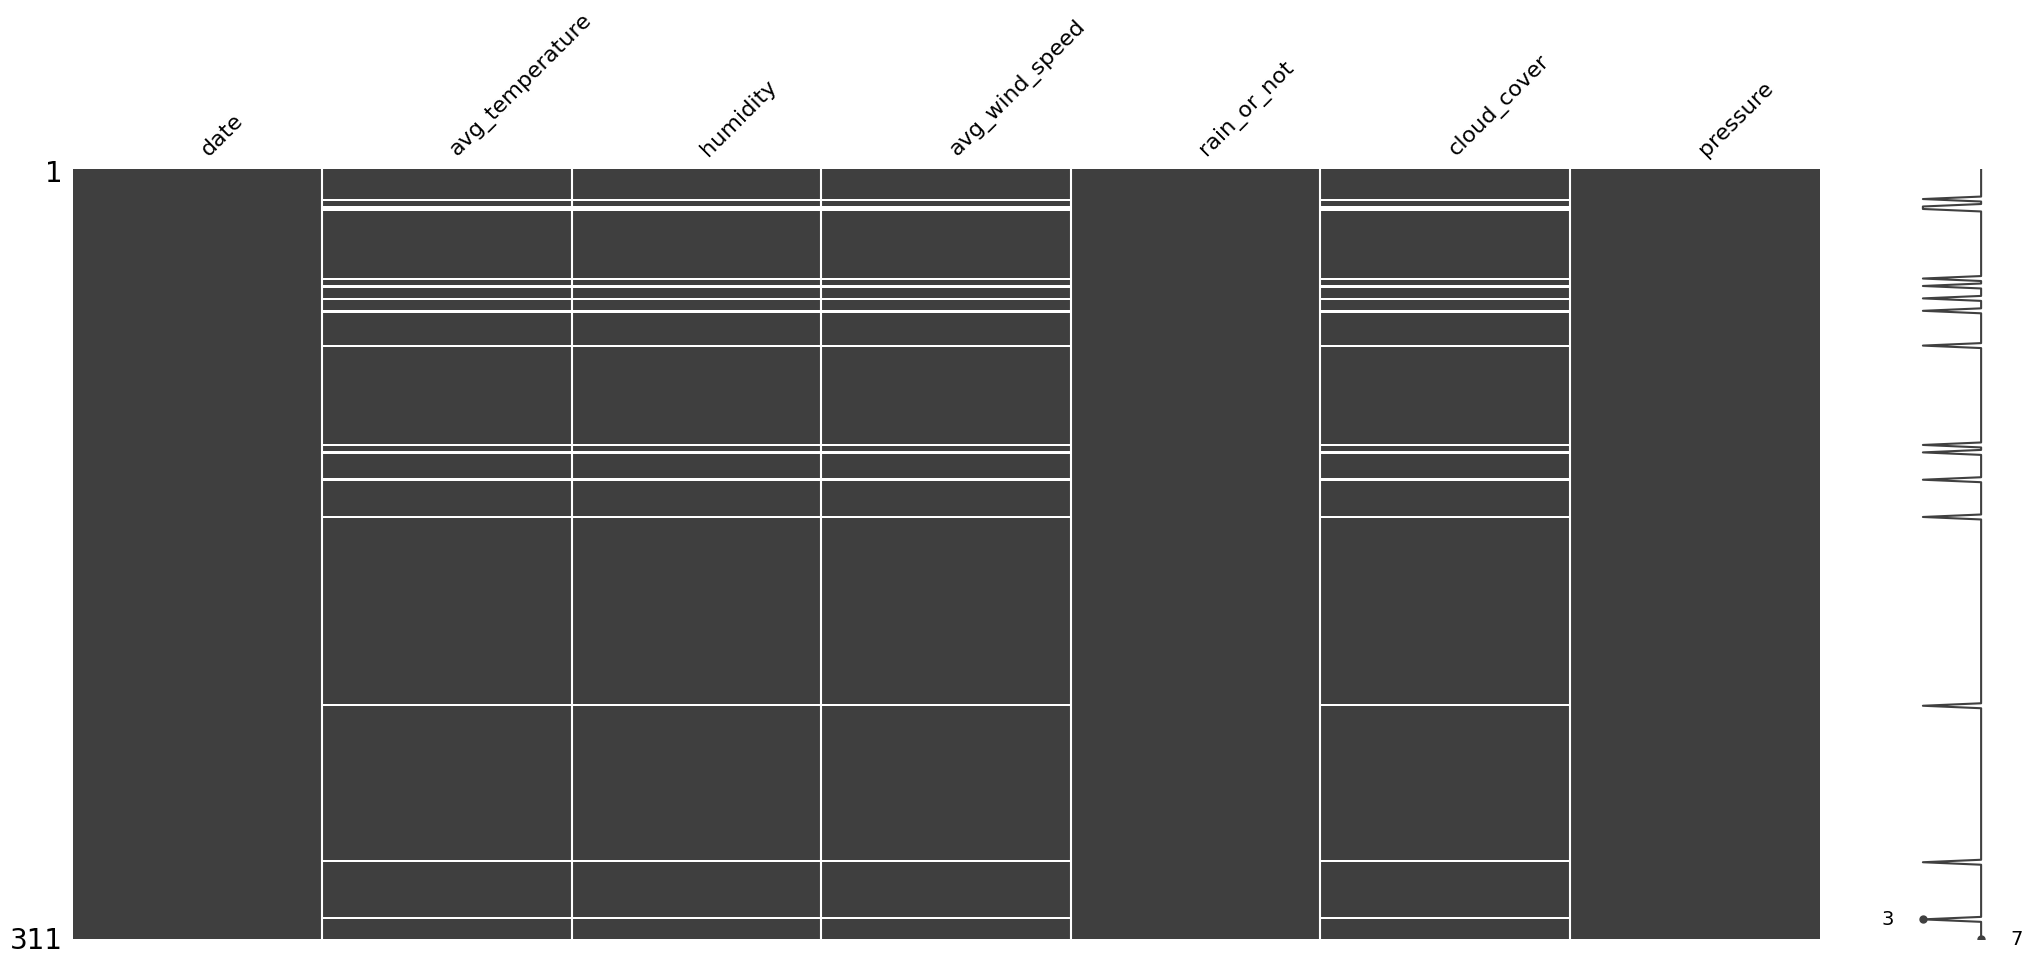

In [63]:
msno.matrix(df)

c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 1.0, 'Distribution of Pressure')

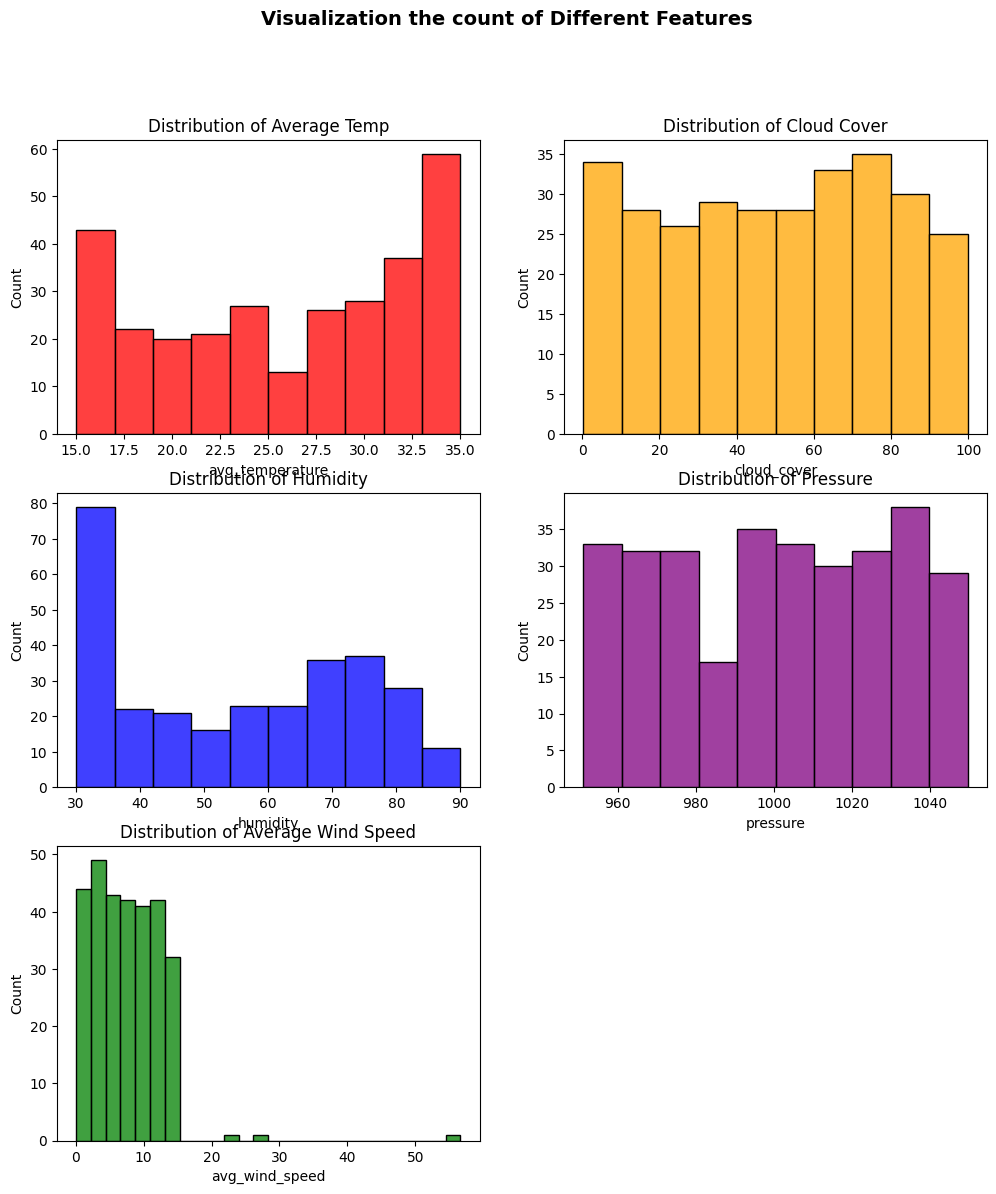

In [64]:

plt.figure(figsize=(12,13))

plt.suptitle('Visualization the count of Different Features', fontsize=14, fontweight='bold')

plt.subplot(3,2,1)
sns.histplot(data=df,x='avg_temperature',color='red')
plt.title('Distribution of Average Temp')

plt.subplot(3,2,3)
sns.histplot(data=df,x='humidity',color='blue')
plt.title('Distribution of Humidity')

plt.subplot(3,2,5)
sns.histplot(data=df,x='avg_wind_speed',color='green')
plt.title('Distribution of Average Wind Speed')

plt.subplot(3,2,2)
sns.histplot(data=df,x='cloud_cover',color='orange')
plt.title('Distribution of Cloud Cover')

plt.subplot(3,2,4)
sns.histplot(data=df,x='pressure',color='purple')
plt.title('Distribution of Pressure')

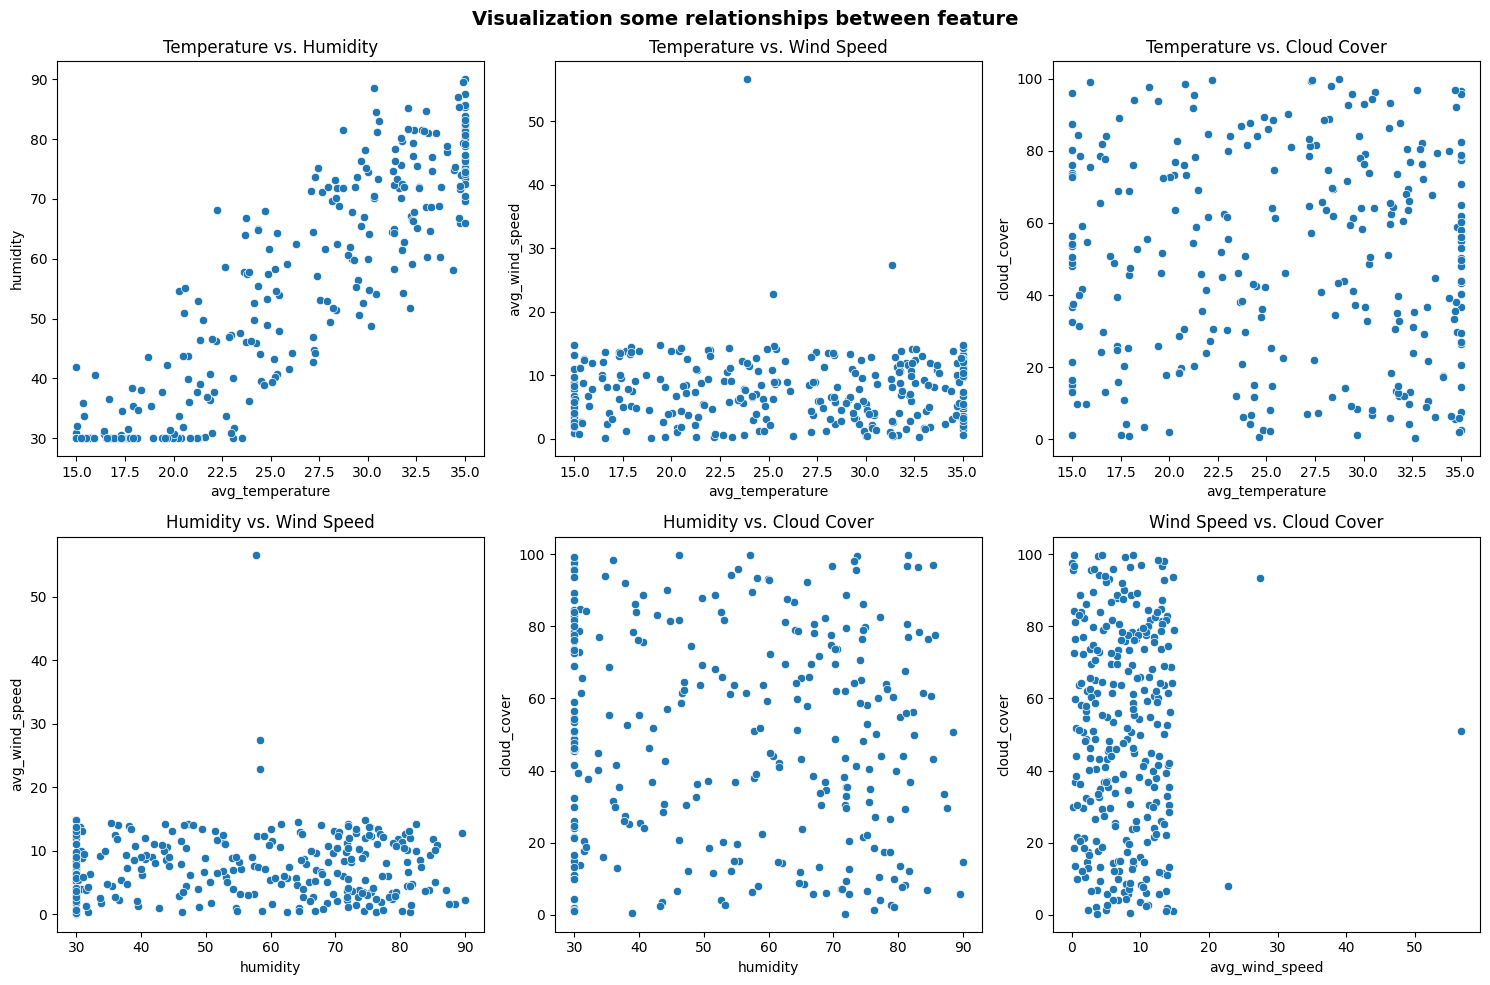

In [65]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.suptitle('Visualization some relationships between feature', fontsize=14, fontweight='bold')


# Plot scatter plots for relationships
sns.scatterplot(x='avg_temperature', y='humidity', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Temperature vs. Humidity')

sns.scatterplot(x='avg_temperature', y='avg_wind_speed', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Temperature vs. Wind Speed')

sns.scatterplot(x='avg_temperature', y='cloud_cover', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Temperature vs. Cloud Cover')

sns.scatterplot(x='humidity', y='avg_wind_speed', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Humidity vs. Wind Speed')

sns.scatterplot(x='humidity', y='cloud_cover', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Humidity vs. Cloud Cover')

sns.scatterplot(x='avg_wind_speed', y='cloud_cover', data=df, ax=axs[1, 2])
axs[1, 2].set_title('Wind Speed vs. Cloud Cover')


plt.tight_layout()
plt.show()


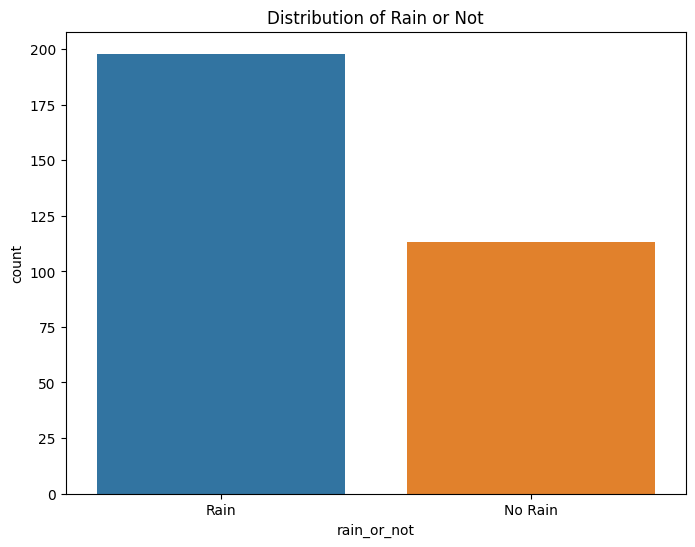

In [66]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='rain_or_not', data=df)
plt.title('Distribution of Rain or Not')
plt.show()

<Axes: >

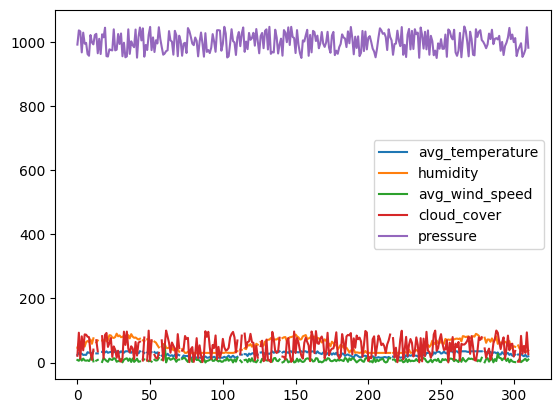

In [67]:
# Distribution of the different features
df[['avg_temperature', 'humidity', 'avg_wind_speed',
       'cloud_cover', 'pressure']].plot()

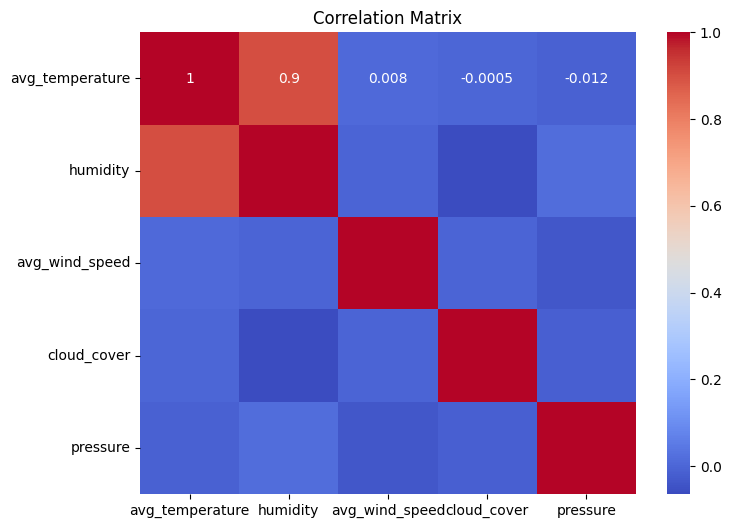

In [68]:
# Visualize the correlation matrix

numerical_df = df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [69]:
# Outliers Detection using the IQR method
outliers = {}
for column in ['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover','pressure']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

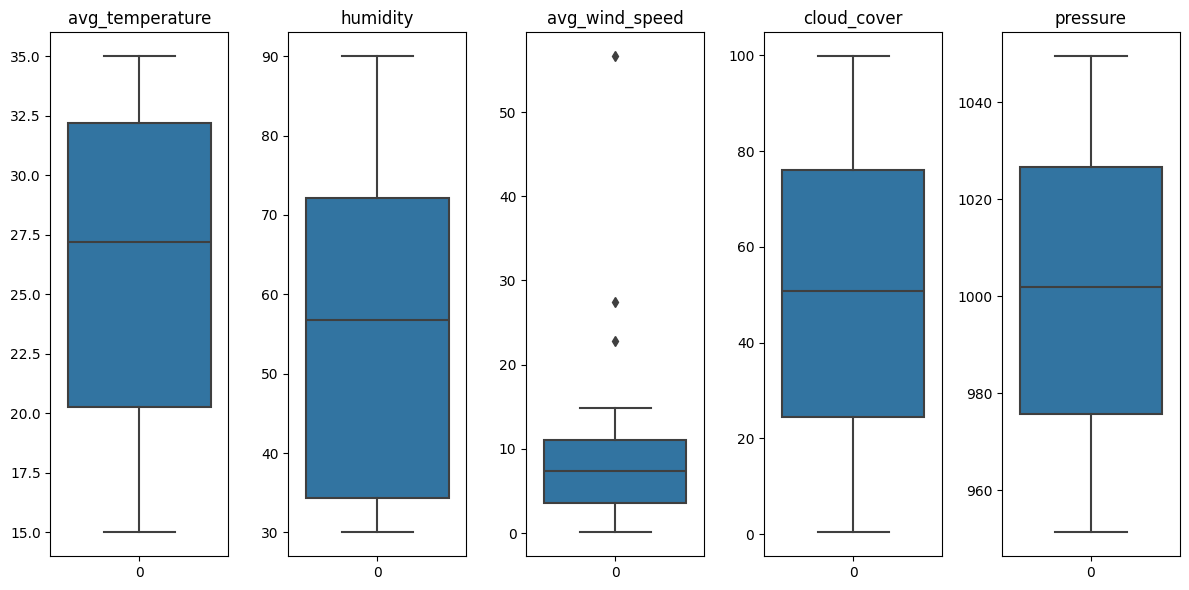

In [70]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover','pressure']):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [71]:
# check the shape of the dataframe before removing the outliers
df.shape

(311, 7)

In [72]:
# Check duplicate values
df.duplicated().sum()

0

In [73]:
# Label encoding the target variable
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

In [74]:
# Drop the date column
df.drop('date', axis=1, inplace=True)

In [75]:
# Missing values handling

# Create independent copies of the original DataFrame
df_drop = df.copy()
df_fill = df.copy()

# Drop rows with missing values
df_drop.dropna(inplace=True)

# Fill missing values with column means
df_fill.fillna(df.mean(), inplace=True)

# Check the shapes
print("Original DF Shape:", df.shape)
print("DF After Dropping NA Shape:", df_drop.shape)
print("DF After Filling NA Shape:", df_fill.shape)

Original DF Shape: (311, 6)
DF After Dropping NA Shape: (296, 6)
DF After Filling NA Shape: (311, 6)


In [76]:
# check the dataframe
df.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [77]:
#  Function to impute outliers with median

def impute_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with median
        median_value = df[column].median()
        df.loc[(df[column] < lower_bound), column] = median_value
        df.loc[(df[column] > upper_bound), column] = median_value
        
    return df

In [78]:
# create new dataframe to impute the outliers with the fill missing values with median
df_no_outliers = df_fill.copy()

columns_to_impute = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
df_imputed = impute_outliers_with_median(df_no_outliers, columns_to_impute)

print("shape of the outliers remove dateset",df_imputed.shape)

shape of the outliers remove dateset (311, 6)


### Splitting the dataset




In [79]:
# split the impute dataset into X and y
X1 = df_imputed.drop('rain_or_not', axis=1)
y1 = df_imputed['rain_or_not']

# split the drop missing values dataset into X and y
X2 = df_drop.drop('rain_or_not', axis=1)
y2 = df_drop['rain_or_not']

In [80]:
# split the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=10)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=10)

In [81]:
print("Shape of the X1_train:", X1_train.shape)
print("Shape of the X1_test:", X1_test.shape)
print("Shape of the y1_train:", y1_train.shape)
print("Shape of the y1_test:", y1_test.shape)

Shape of the X1_train: (248, 5)
Shape of the X1_test: (63, 5)
Shape of the y1_train: (248,)
Shape of the y1_test: (63,)


In [82]:
# Standardize the features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X1_train)
x_test_scaled = scaler.transform(X1_test)
x1_train_scaled = scaler.fit_transform(X2_train)
x1_test_scaled = scaler.transform(X2_test)

In [83]:
# check the X_train_scaled

x_train_scaled

array([[-0.1586634 ,  0.3416325 ,  1.63222414, -0.28228489, -0.94337857],
       [-1.65637866, -1.3423233 ,  0.58718703,  0.14811252,  1.28645551],
       [-1.25410808, -1.3423233 ,  1.54511263, -1.39043295, -0.61693958],
       ...,
       [ 0.0030607 , -0.00713136,  0.06030914, -0.00801455,  0.36823648],
       [ 0.0030607 , -0.00713136,  0.06030914, -0.00801455, -1.22301299],
       [ 1.3652229 ,  1.45166651,  1.65353149,  0.21658167,  0.27176901]])

In [84]:
# Balance the Inbalanced dataset using SMOTE

x_train_balanced, y_train_balanced = SMOTE().fit_resample(x_train_scaled, y1_train)
x1_train_balanced, y1_train_balanced = SMOTE().fit_resample(x1_train_scaled, y2_train)

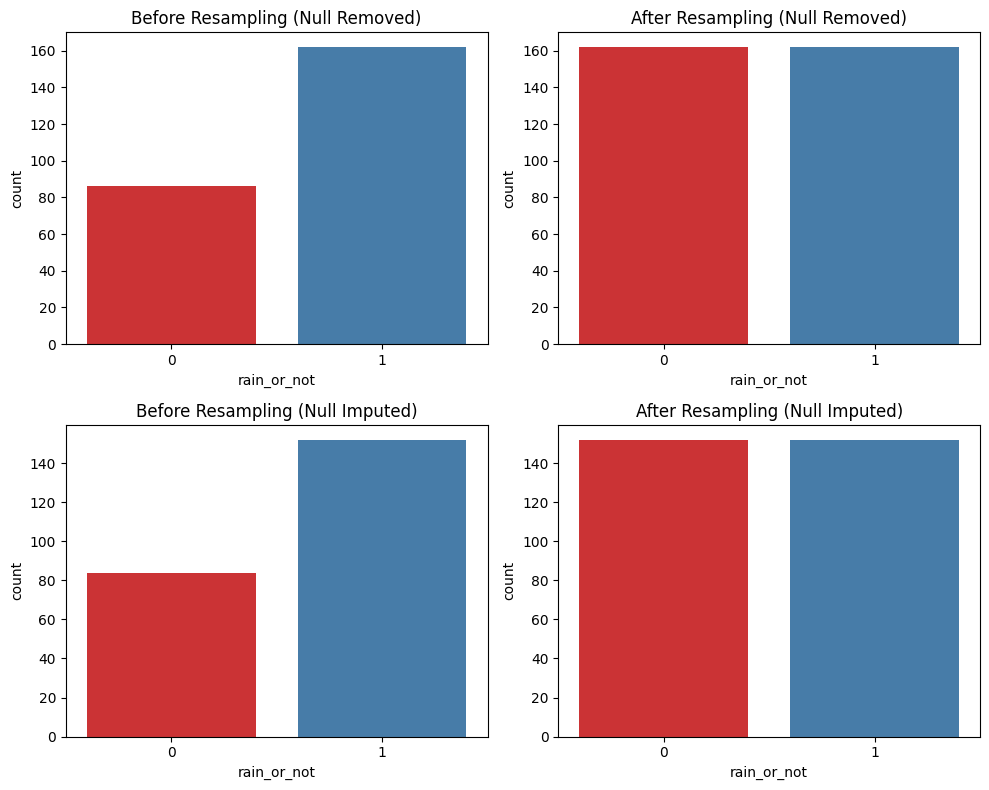

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# Plot countplot for before resampling (null removed)
sns.countplot(x=y1_train, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Before Resampling (Null Removed)')

# Plot countplot for after resampling (null removed)
sns.countplot(x=y_train_balanced, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('After Resampling (Null Removed)')

# Plot countplot for before resampling (null imputed)
sns.countplot(x=y2_train, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Before Resampling (Null Imputed)')

# Plot countplot for after resampling (null imputed)
sns.countplot(x=y1_train_balanced, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('After Resampling (Null Imputed)')

plt.tight_layout()
plt.show()


### Train and evaluate machine learning models 

In [86]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
}

# Model Accuracy before tuning
model_accuracies = {}

# classification report before tuning
classification_reports = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(x_train_balanced, y_train_balanced)
    
    # Predict on the test set
    y_pred = model.predict(x_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, y_pred)

    # Store the accuracy in the model_accuracies dictionary
    model_accuracies[name] = accuracy

    # Store the classification report in the classification_reports dictionary
    classification_reports[name] = classification_report(y1_test, y_pred)

    print(f"Model: {name}")
    print(f"Test Accuracy for Imputed Dataset: {accuracy:.3f}")
    print("Classification Report:\n", classification_report(y1_test, y_pred))
    print("\n")

Model: LogisticRegression
Test Accuracy for Imputed Dataset: 0.667
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62        27
           1       0.71      0.69      0.70        36

    accuracy                           0.67        63
   macro avg       0.66      0.66      0.66        63
weighted avg       0.67      0.67      0.67        63



Model: DecisionTree
Test Accuracy for Imputed Dataset: 0.587
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.37      0.43        27
           1       0.61      0.75      0.67        36

    accuracy                           0.59        63
   macro avg       0.57      0.56      0.55        63
weighted avg       0.58      0.59      0.57        63



Model: RandomForest
Test Accuracy for Imputed Dataset: 0.683
Classification Report:
               precision    recall  f1-score   support

           0       0.67   

In [87]:
from tabulate import tabulate

# Convert accuracies to table format
accuracy_table = tabulate(model_accuracies.items(), headers=["Model", "Accuracy"], tablefmt="pretty")

# Convert classification reports to table format
report_table = tabulate(classification_reports.items(), headers=["Model", "Classification Report"], tablefmt="pretty")

print("Model Accuracies before tuning:\n", accuracy_table)
print("\nClassification Reports before tuning:\n", report_table)


Model Accuracies before tuning:
 +--------------------+--------------------+
|       Model        |      Accuracy      |
+--------------------+--------------------+
| LogisticRegression | 0.6666666666666666 |
|    DecisionTree    | 0.5873015873015873 |
|    RandomForest    | 0.6825396825396826 |
|  GradientBoosting  | 0.6190476190476191 |
+--------------------+--------------------+

Classification Reports before tuning:
 +--------------------+-------------------------------------------------------+
|       Model        |                 Classification Report                 |
+--------------------+-------------------------------------------------------+
| LogisticRegression |        precision    recall  f1-score   support        |
|                    |                                                       |
|                    |            0       0.61      0.63      0.62        27 |
|                    |            1       0.71      0.69      0.70        36 |
|                    |

### Optimize the model using hyperparameter tuning and feature engineering

In [88]:
# Define models and hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params':
        {   
            'penalty':['l1','l2','elasticnet','none'],
            'C' : [0.033,0.1, 1, 10],
            'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter'  : [100,1000,2500,5000]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': 
        {
            'criterion': ['gini', 'entropy','log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10],
            # 'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': 
        {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1,0.01,0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
}

In [89]:
# Model Accuracy after tuning
model_accuracies_tuned = {}

# classification report after tuning
classification_reports_tuned = {}

# Cross-validation scores after tuning
cv_scores_tuned = {}

# Dictionaries to store best hyperparameters and accuracies
best_params_lr = best_params_dt = best_params_rf = best_params_gb = {}

# Define model names and their corresponding variable mappings
best_params_dict = {
    'LogisticRegression': 'best_params_lr',
    'DecisionTree': 'best_params_dt',
    'RandomForest': 'best_params_rf',
    'GradientBoosting': 'best_params_gb',
}


In [90]:

# Perform cross-validation and hyperparameter tuning
for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

    grid_search.fit(x_train_balanced, y_train_balanced)

    # Get best hyperparameters
    best_params = grid_search.best_params_    
    # Assign the best parameters to the corresponding variable
    globals()[best_params_dict[name]] = best_params

    best_score = grid_search.best_score_

    # Store the best cross-validation score
    cv_scores_tuned[name] = best_score

    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best Cross-Validation Score: {best_score}")

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)

    accuracy = accuracy_score(y1_test, y_pred)
    model_accuracies_tuned[name] = accuracy
    print(f"Test Accuracy for Imputed Date: {accuracy:.3f}")

    classification_reports = classification_report(y1_test, y_pred)
    classification_reports_tuned[name] = classification_report
    print("Classification Report:\n", classification_reports)
    print("\n")

c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been depreca

Best Parameters for LogisticRegression: {'C': 0.033, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.6325480769230769
Test Accuracy for Imputed Date: 0.746
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.81      0.72      0.76        36

    accuracy                           0.75        63
   macro avg       0.74      0.75      0.74        63
weighted avg       0.75      0.75      0.75        63



Best Parameters for DecisionTree: {'criterion': 'log_loss', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.6821634615384615
Test Accuracy for Imputed Date: 0.619
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.45        27
           1       0.63      0.81      0.71        36

    accuracy                     

c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
675 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File 

Best Parameters for GradientBoosting: {'learning_rate': 1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.7286057692307694
Test Accuracy for Imputed Date: 0.651
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.48      0.54        27
           1       0.67      0.78      0.72        36

    accuracy                           0.65        63
   macro avg       0.64      0.63      0.63        63
weighted avg       0.65      0.65      0.64        63





In [91]:
# Best hyperparameters for each model
print("Best Hyperparameters for Logistic Regression:", best_params_lr)
print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

Best Hyperparameters for Logistic Regression: {'C': 0.033, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters for Decision Tree: {'criterion': 'log_loss', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


In [102]:
from tabulate import tabulate

# Convert accuracies to table format
accuracy_table_tuned = tabulate(model_accuracies_tuned.items(), headers=["Model", "Tuned Accuracy"], tablefmt="pretty")

# Convert classification reports to table format
report_table_tuned = tabulate(classification_reports_tuned.items(), headers=["Model", "Classification Report"], tablefmt="pretty")

# Convert confusion matrices to table format
confusion_table_tuned = tabulate(cv_scores_tuned.items(), headers=["Model", "Confusion Matrix"], tablefmt="pretty")

print("Model Accuracies after tuning:\n", accuracy_table_tuned)
print("\nConfusion Matrices after tuning:\n", confusion_table_tuned)




Model Accuracies after tuning:
 +--------------------+--------------------+
|       Model        |   Tuned Accuracy   |
+--------------------+--------------------+
| LogisticRegression | 0.746031746031746  |
|    DecisionTree    | 0.6190476190476191 |
|    RandomForest    | 0.6984126984126984 |
|  GradientBoosting  | 0.6507936507936508 |
+--------------------+--------------------+

Confusion Matrices after tuning:
 +--------------------+--------------------+
|       Model        |  Confusion Matrix  |
+--------------------+--------------------+
| LogisticRegression | 0.6325480769230769 |
|    DecisionTree    | 0.6821634615384615 |
|    RandomForest    | 0.7253846153846155 |
|  GradientBoosting  | 0.7286057692307694 |
+--------------------+--------------------+


In [93]:

# Train models for null imputed data
model_lr_null_imputed = LogisticRegression(**best_params_lr)
model_dt_null_imputed = DecisionTreeClassifier(**best_params_dt)
model_rf_null_imputed = RandomForestClassifier(**best_params_rf)
model_gb_null_imputed = GradientBoostingClassifier(**best_params_gb)



model_lr_null_imputed.fit(x_train_balanced, y_train_balanced)
model_dt_null_imputed.fit(x_train_balanced, y_train_balanced)
model_rf_null_imputed.fit(x_train_balanced, y_train_balanced)
model_gb_null_imputed.fit(x_train_balanced, y_train_balanced)


# Train models for null removed data
model_lr_null_removed = LogisticRegression(**best_params_lr)
model_dt_null_removed = DecisionTreeClassifier(**best_params_dt)
model_rf_null_removed = RandomForestClassifier(**best_params_rf)
model_gb_null_removed = GradientBoostingClassifier(**best_params_gb)

model_lr_null_removed.fit(x1_train_balanced, y1_train_balanced)
model_dt_null_removed.fit(x1_train_balanced, y1_train_balanced)
model_rf_null_removed.fit(x1_train_balanced, y1_train_balanced)
model_gb_null_removed.fit(x1_train_balanced, y1_train_balanced)




GradientBoostingClassifier(learning_rate=1, max_depth=10, max_features='sqrt',
                           min_samples_split=5)

In [94]:
# Predict and evaluate models for  imputed data
y_pred_lr_null_imputed = model_lr_null_imputed.predict(x_test_scaled)
y_pred_dt_null_imputed = model_dt_null_imputed.predict(x_test_scaled)
y_pred_rf_null_imputed = model_rf_null_imputed.predict(x_test_scaled)
y_pred_gb_null_imputed = model_gb_null_imputed.predict(x_test_scaled)


# Predict and evaluate models for null remove data
y_pred_lr_null_removed = model_lr_null_removed.predict(x1_test_scaled)
y_pred_dt_null_removed = model_dt_null_removed.predict(x1_test_scaled)
y_pred_rf_null_removed = model_rf_null_removed.predict(x1_test_scaled)
y_pred_gb_null_removed = model_gb_null_removed.predict(x1_test_scaled)

accuracy_lr_null_removed = accuracy_score(y2_test, y_pred_lr_null_removed)
accuracy_dt_null_removed = accuracy_score(y2_test, y_pred_dt_null_removed)
accuracy_rf_null_removed = accuracy_score(y2_test, y_pred_rf_null_removed)
accuracy_gb_null_removed = accuracy_score(y2_test, y_pred_gb_null_removed)



In [95]:

model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting']

imputed_accuracies = [model_accuracies_tuned[name] for name in model_names]

accuracy_results = pd.DataFrame({
    'Model': model_names,
    'Null Removed Accuracy': [accuracy_lr_null_removed, accuracy_dt_null_removed, accuracy_rf_null_removed, accuracy_gb_null_removed],
    'Imputed Accuracy': imputed_accuracies
})

print(accuracy_results)

                Model  Null Removed Accuracy  Imputed Accuracy
0  LogisticRegression               0.683333          0.746032
1        DecisionTree               0.433333          0.619048
2        RandomForest               0.533333          0.698413
3    GradientBoosting               0.516667          0.650794


In [96]:

# For logistic regression model with null removed data
f1_lr_null_removed = f1_score(y2_test, y_pred_lr_null_removed)
precision_lr_null_removed = precision_score(y2_test, y_pred_lr_null_removed)
recall_lr_null_removed = recall_score(y2_test, y_pred_lr_null_removed)


# For decision tree model with null removed data
f1_dt_null_removed = f1_score(y2_test, y_pred_dt_null_removed)
precision_dt_null_removed = precision_score(y2_test, y_pred_dt_null_removed)
recall_dt_null_removed = recall_score(y2_test, y_pred_dt_null_removed)


# For random forest model with null removed data
f1_rf_null_removed = f1_score(y2_test, y_pred_rf_null_removed)
precision_rf_null_removed = precision_score(y2_test, y_pred_rf_null_removed)
recall_rf_null_removed = recall_score(y2_test, y_pred_rf_null_removed)


# For gradient boosting model with null removed data
f1_gb_null_removed = f1_score(y2_test, y_pred_gb_null_removed)
precision_gb_null_removed = precision_score(y2_test, y_pred_gb_null_removed)
recall_gb_null_removed = recall_score(y2_test, y_pred_gb_null_removed)


# create table for displaying the results
results_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr_null_removed, accuracy_dt_null_removed, accuracy_rf_null_removed, accuracy_gb_null_removed],
    'F1 Score': [f1_lr_null_removed, f1_dt_null_removed, f1_rf_null_removed, f1_gb_null_removed],
    'Precision': [precision_lr_null_removed, precision_dt_null_removed, precision_rf_null_removed, precision_gb_null_removed],
    'Recall': [recall_lr_null_removed, recall_dt_null_removed, recall_rf_null_removed, recall_gb_null_removed]
})

print("Results for Null Removed Data:")
results_table


Results for Null Removed Data:


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.683333,0.716418,0.800000,0.648649
1,Decision Tree,0.433333,0.514286,0.545455,0.486486
2,Random Forest,0.533333,0.621622,0.621622,0.621622
3,Gradient Boosting,0.516667,0.602740,0.611111,0.594595


In [97]:
# For logistic regression model with null imputed data

f1_lr_null_imputed = f1_score(y1_test, y_pred_lr_null_imputed)
precision_lr_null_imputed = precision_score(y1_test, y_pred_lr_null_imputed)
recall_lr_null_imputed = recall_score(y1_test, y_pred_lr_null_imputed)

# For decision tree model with null imputed data

f1_dt_null_imputed = f1_score(y1_test, y_pred_dt_null_imputed)
precision_dt_null_imputed = precision_score(y1_test, y_pred_dt_null_imputed)
recall_dt_null_imputed = recall_score(y1_test, y_pred_dt_null_imputed)

# For random forest model with null imputed data

f1_rf_null_imputed = f1_score(y1_test, y_pred_rf_null_imputed)
precision_rf_null_imputed = precision_score(y1_test, y_pred_rf_null_imputed)
recall_rf_null_imputed = recall_score(y1_test, y_pred_rf_null_imputed)

# For gradient boosting model with null imputed data

f1_gb_null_imputed = f1_score(y1_test, y_pred_gb_null_imputed)
precision_gb_null_imputed = precision_score(y1_test, y_pred_gb_null_imputed)
recall_gb_null_imputed = recall_score(y1_test, y_pred_gb_null_imputed)


model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting']

imputed_accuracies = [model_accuracies_tuned[name] for name in model_names]

results_table1 = pd.DataFrame({
    'Model': model_names,
    'Accuracy': imputed_accuracies,
    'F1 Score': [f1_lr_null_imputed, f1_dt_null_imputed, f1_rf_null_imputed, f1_gb_null_imputed],
    'Precision': [precision_lr_null_imputed, precision_dt_null_imputed, precision_rf_null_imputed, precision_gb_null_imputed],
    'Recall': [recall_lr_null_imputed, recall_dt_null_imputed, recall_rf_null_imputed, recall_gb_null_imputed]
})

print("Results for Null Imputed Data:")
results_table1

Results for Null Imputed Data:


,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.746032,0.764706,0.812500,0.722222
1,DecisionTree,0.619048,0.698795,0.617021,0.805556
2,RandomForest,0.698413,0.736842,0.700000,0.777778
3,GradientBoosting,0.650794,0.734177,0.674419,0.805556


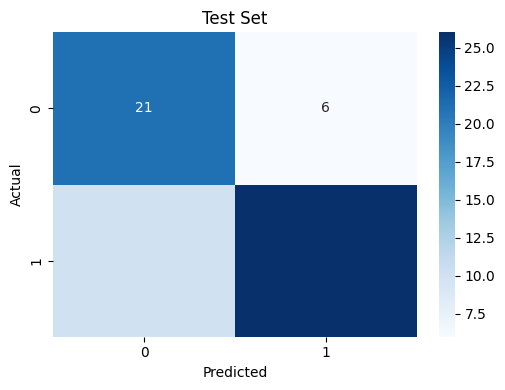

In [98]:
# Confusion matrix for logistic regression model with impute data
conf_matrix_test = confusion_matrix(y1_test, y_pred_lr_null_imputed)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues")
plt.title("Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

0.7500000000000001


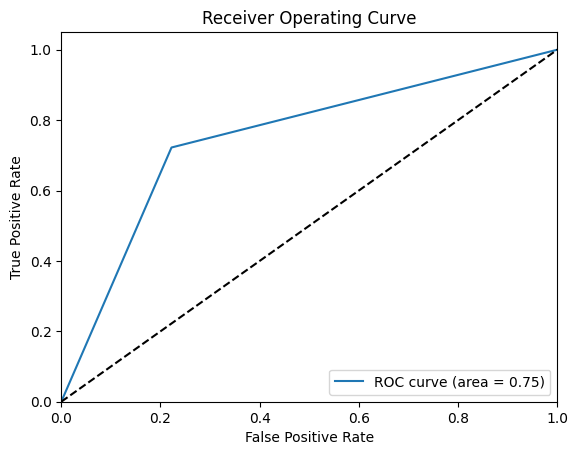

0.7500000000000001


In [99]:
#  ROC curve for logistic regression model with impute data
ROC =   roc_auc_score(y1_test, y_pred_lr_null_imputed)
print(ROC)
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_lr_null_imputed)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % ROC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.legend(loc="lower right")
plt.show()

Area_Under_Curve = roc_auc_score(y1_test, y_pred_lr_null_imputed)
print(Area_Under_Curve)


### Prediction of the rain for next 21 days

In [100]:
# create random weather data
def simulate_weather_data(days):
    simulated_data = {
        'avg_temperature': np.random.uniform(15, 30, size=days),
        'humidity': np.random.uniform(35, 80, size=days),
        'avg_wind_speed': np.random.uniform(10, 20, size=days),
        'cloud_cover': np.random.uniform(30, 100, size=days),
        'pressure': np.random.uniform(950, 1050, size=days)
    }
    df = pd.DataFrame(simulated_data)

    return df

In [103]:
# Predict rain using the logistic regression model

def predict_rain(model, scaler, simulated_data):
    scaled_data = scaler.transform(simulated_data)
    predictions = model.predict(scaled_data)
    probabilities = model.predict_proba(scaled_data)

    return predictions, probabilities

simulated_data = simulate_weather_data(21)
predictions, probabilities = predict_rain(model_lr_null_imputed, scaler, simulated_data)

# Print predictions with probabilities
for i, (prediction, prob) in enumerate(zip(predictions, probabilities)):
    rain_prob = prob[1]  # Probability of rain
    print(f"Day {i+1}: Probability of Rain: {rain_prob:.2%}")

Day 1: Probability of Rain: 50.97%
Day 2: Probability of Rain: 45.26%
Day 3: Probability of Rain: 49.24%
Day 4: Probability of Rain: 48.02%
Day 5: Probability of Rain: 48.89%
Day 6: Probability of Rain: 52.30%
Day 7: Probability of Rain: 47.24%
Day 8: Probability of Rain: 50.59%
Day 9: Probability of Rain: 51.99%
Day 10: Probability of Rain: 50.31%
Day 11: Probability of Rain: 50.53%
Day 12: Probability of Rain: 52.62%
Day 13: Probability of Rain: 52.70%
Day 14: Probability of Rain: 48.28%
Day 15: Probability of Rain: 50.11%
Day 16: Probability of Rain: 51.33%
Day 17: Probability of Rain: 50.16%
Day 18: Probability of Rain: 52.89%
Day 19: Probability of Rain: 53.37%
Day 20: Probability of Rain: 49.54%
Day 21: Probability of Rain: 45.95%
